In [1]:
%matplotlib notebook
import h5py
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-notebook')

In [2]:
try:
    ztt = h5py.File('data/emu_zttllcxxx_is722.h5', 'r')['h10']
    yy = h5py.File('data/emu_dyemxmg25_py560.h5', 'r')['h10']
    ww = h5py.File('data/emu_wwllcxxxx_py057.h5', 'r')['h10']
    tt = h5py.File('data/emu_ttll170xs_hw05.h5', 'r')['h10']
    dsets = {'ztt':ztt, 'yy':yy, 'ww':ww, 'tt':tt}
except FileNotFoundError:
    print('File not found, check data folder or file string')
    
glabels={'ztt':r'$Z\rightarrow \tau\tau$',  
         'yy':r'$Z\rightarrow \gamma\gamma$', 
         'ww':r'$Z\rightarrow WW$', 
         'tt':r'$Z\rightarrow tt$'}

In [10]:
def plot_hists(var, range=None):
    fig, ax = plt.subplots(2, 2, sharex=True,sharey=True, squeeze=True)
    fig.subplots_adjust(wspace=.1, hspace=.1, top=.925)
    
    if(range): fig.suptitle('{} {}'.format(var, range), fontsize=16)
    else: fig.suptitle(var, fontsize=16)
    hists = {'ztt':None, 'yy':None, 'ww':None, 'tt':None}
    
    args = {'normed':False, 'range':range, 'bins':'auto'}
        
    hists['ztt'] = ax[0, 0].hist(ztt[var], **args)
    ax[0, 0].set_title(glabels['ztt'])
    hists['yy'] = ax[0, 1].hist(yy[var], **args)
    ax[0, 1].set_title(glabels['yy'])
    hists['ww'] = ax[1, 0].hist(ww[var], **args)
    ax[1, 0].set_title(glabels['ww'])
    hists['tt'] = ax[1, 1].hist(tt[var], **args)
    ax[1, 1].set_title(glabels['tt'])
    
    return hists

In [11]:
def stack_plot(var, range=None):
    fig = plt.figure()
    
    if(range): fig.suptitle('{} {}'.format(var, range), fontsize=16)
    else: fig.suptitle(var, fontsize=16)
    
    args = {'range':range, 'bins':'auto', 'normed':False, 'alpha':0.25}
    hists = {data:plt.hist(dsets[data][var], label=glabels[data], **args) 
             for data in ['ztt', 'yy', 'ww', 'tt']}
    plt.legend()
    return hists

In [12]:
def get_counts(hists):
    labels = ['ztt', 'ww', 'yy', 'tt']
    return {data:hists[data][0].sum() for data in labels}

<IPython.core.display.Javascript object>


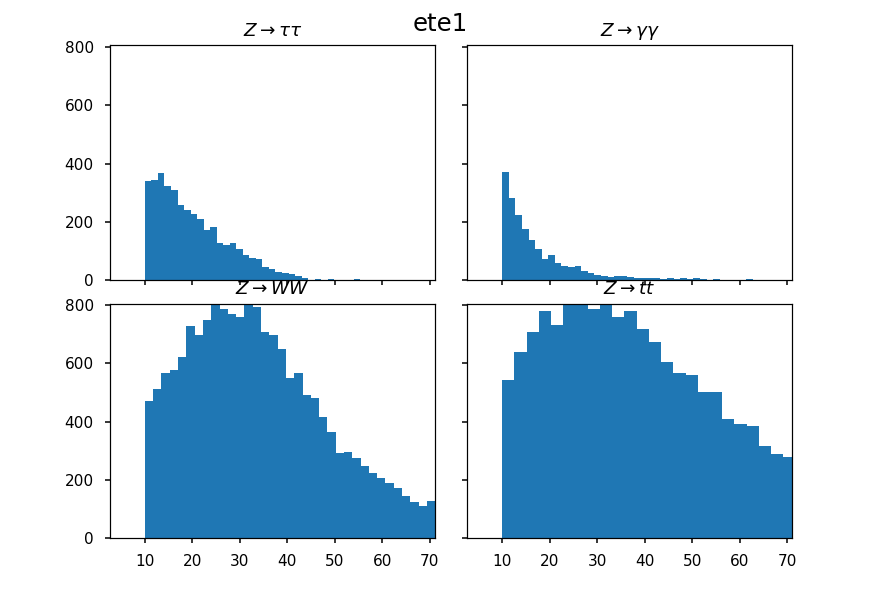

{'ztt': 3891.0, 'ww': 18230.0, 'yy': 1892.0, 'tt': 17159.0}


In [13]:
h1 = plot_hists('ete1');
print(get_counts(h1))

<IPython.core.display.Javascript object>


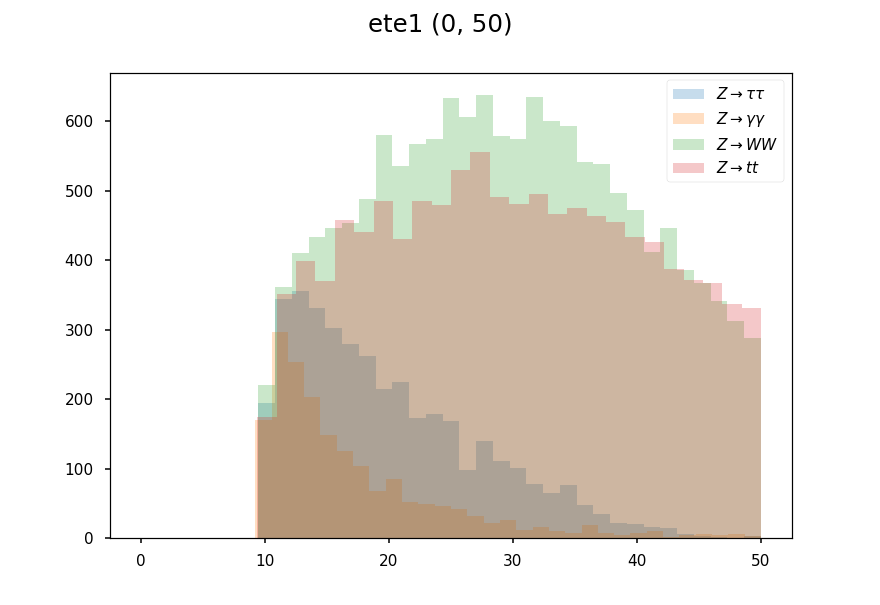

{'ztt': 3879.0, 'ww': 14533.0, 'yy': 1854.0, 'tt': 11141.0}


In [14]:
h2 = stack_plot('ete1', range=(0, 50));
print(get_counts(h2))